<a href="https://colab.research.google.com/github/ValereTamwo/AlGORITHME-DE-DESCENTE-DE-GRADIENT---A-pas-fixe-_Optimal_Newton_Local/blob/master/Decision_Tree_QUEST_METHOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INF3236 : APPRENTISSAGE ARTIFICIEL 1**

## TP1 : Arbre de Decision - **METHODE QUEST** 

[Lien vers le dataSet Kaggle : HEART ATTACK dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

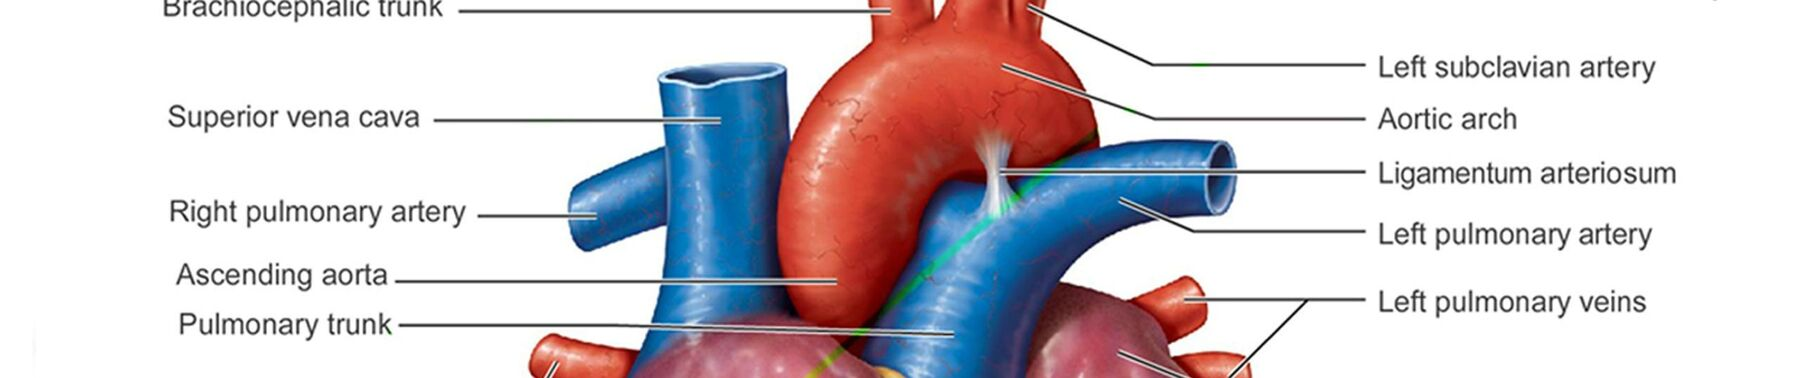

### **SECTION 1** : DESCRIPTION DE LA METHODE QUEST (Quick ,Unbiased Efficient statistical Trees)

#### A- PRINCIPE

L'algorithme QUEST (Quick, Unbiased, Efficient Statistical Tree) est un algorithme d'apprentissage supervisé utilisé pour construire des arbres de décision. Il permet de classer des exemples en fonction de plusieurs caractéristiques ou attributs, en utilisant une méthode de division récursive de l'espace de recherche. L'algorithme se base sur une mesure de la qualité de la division, qui permet de choisir l'attribut et la valeur de coupure qui maximisent la séparation des classes. L'arbre de décision ainsi construit peut être utilisé pour la classification de nouveaux exemples.


*   Cette approche permet à l'algorithme d'identifier les variables les plus informatives et de minimiser le nombre de divisions nécessaires pour classer les données avec précision.


*   De plus, il a été démontré que QUEST produit des résultats impartiaux(Unbiased) en utilisant des tests statistiques pour déterminer la signification de chaque split, ce qui permet d'éviter un surapprentissage des données.







#### B- ALGORITHME

Voici un resume succint de  l'algorithme  QUEST : 


1.  Commencer avec l'ensemble complet des donnees

2.   Selectionner la valeur et la variable qui maximisent le gain d'information ou le coefficient de Gini pour diviser l'ensemble des donnees en deux sous ensembles

3. Tester la significativité statistique  de la division en utilisant un test de **Wald** ou autre methode de test statistique approprié.

4. Si la division est significative , creer un noeud pour cette division et repeter les etapes 2-3 pour chaque sous-ensembles de donnees jusqu'a ce que toutes les feuilles soient purement classees ou que les criteres d'arret soit atteints 

5. Si la division n'est pas significative , creer un noeud pour cet ensemble de  donnees et terminer la construction de l'arbre




### **SECTION 2** : DESCRIPTION DU DATASET (Heart Attack)

### **Information sur le DataSet**


Heart.csv est un jeu de données rassemblant des donnees sur des patients suceptible d'etre epris de crise cardiaque . il  comporte **303 lignes et 14** colonnes   avec pour attribut cible l'attribut **output**.


1 - Description des variables


**sex**:Sexe de la personne

**cp**:Type de douleur thoracique

**trtbps**:Tension artérielle au repos (en mm Hg)

**chol**:Cholestérol en mg/dl récupéré via la capteur IMC

**fbs**:(Glycémie à jeun > 120 mg/dl) (1 = vrai; 0 = faux)

**restecg**:Résultats electrocardiographiques au repos

**thalachh**:Fréquence cardiaque maximale atteinte

**exng**:Angine d'effort (1 = oui; 0 = non)

**oldpeak**:Pic précédent

**slp**:Pente

**caa**:Nombre de grands navires(0-3)

**thall**:Taux de thal

**output**:variable cible


*Variables* *Categorielles* :

 -  'sex'
 -  'cp'
 *  'fbs', 
 * 'restecg' 
 * 'exng'
 * 'oldpeak'
 * 'slp'
 * 'caa'
 * 'thall'
 * 'output'

*Variable Numeriques*


* age
* chol
* trtbps
* 'thalachh'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **Importation du dataset**

> Bloc en retrait



In [2]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1EY42LUz2rgVC1THf_gvJYeQSJFJmgjXn')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### **Test sur les valeurs manquantes et le presence de duplicat** 

In [22]:
Missing = df.isna().sum()
Duplicate = df.duplicated().sum()
display(Missing,Duplicate)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

1

les donnes ne possedent pas de valeurs Manquante sur les differents attributs , cepandant **1** ligne semble etre duplique dans l'ensembles des observations 

**Suppresion des duplicats**

In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### **Description Statistiques de chaque Attribut**

Les Statistiques descriptive ne presenten pas un reel interet pour des variables categorielles

In [31]:
df[['age','chol','trtbps','thalachh']].describe()

,age,chol,trtbps,thalachh
count,302.00000,302.000000,302.000000,302.000000
mean,54.42053,246.500000,131.602649,149.569536
std,9.04797,51.753489,17.563394,22.903527
min,29.00000,126.000000,94.000000,71.000000
25%,48.00000,211.000000,120.000000,133.250000
50%,55.50000,240.500000,130.000000,152.500000
75%,61.00000,274.750000,140.000000,166.000000
max,77.00000,564.000000,200.000000,202.000000


#### **Visualisation de la distribution des Donnees**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

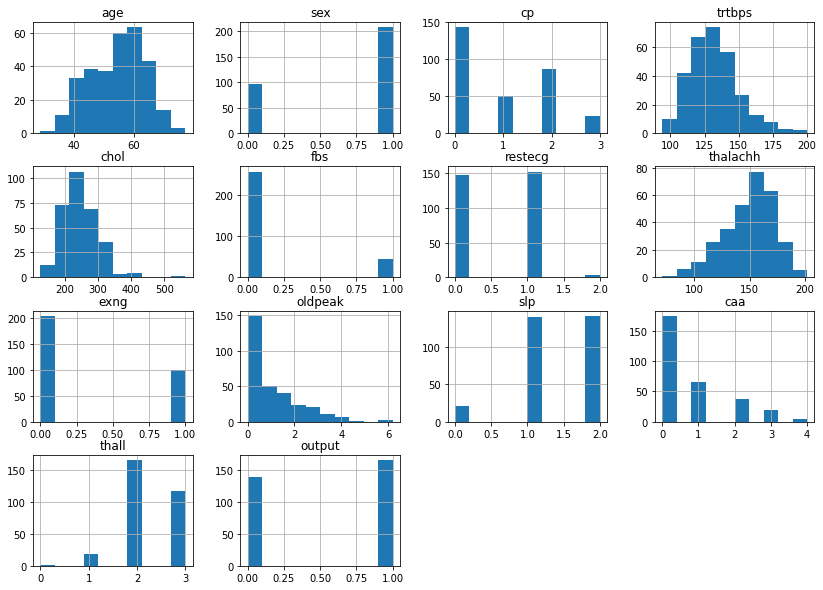

In [4]:
df[df.columns].hist(figsize=(14,10))

**Interpretation de la distribution**

On constate que **L'age , le taux de cholesterol, la tension arterielles et le Nombre de grand Navire** semblent suivrent tous une distribution Normale

l'attribut oldPeak :Pic precedent baisse Continuellement pour l'ensemble des Observations 

L'allure Espacee , dilatee des autre graphiques est tout a fait normal car il s'agit precisement de **variables categorielles**

#### **Moyenne d'age chez les patients atteints de Crise Cardiadiaque**

In [5]:
MeanAge = df.groupby('output')['age'].mean()
print(MeanAge)

output
0    56.601449
1    52.496970
Name: age, dtype: float64


La moyenne etant de 52 ans seulement pour les patteint ayant deja eu de crise , elle n'est pas trop eloignes des autre qui est de 56 ans

donc L'age a lui seul me constitue pas un facteur pertinent d'information

In [6]:
AttackBySexe = df.groupby('sex')['output'].value_counts()
print(AttackBySexe)

sex  output
0    1          72
     0          24
1    0         114
     1          93
Name: output, dtype: int64


In [7]:
100*(93/df.shape[0])

30.693069306930692

Par Contre on constate par la distribution que le sexe est un parametre non neglieagle

Plus d'Hommes semblent atteint par la maladie. environ 31% du nombre total d'observations du dataset

### **SECTION 3** : IMPLEMENTATION DE LA METHODE SUR LE JEU DE DONNEE

### **Importation des Libraries**

In [10]:
!pip install skope-rules

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.model_selection import train_test_split
from skrules  import SkopeRules



### Division des donnees en jeu de test et d'entrainnement

In [13]:
X_train, X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:12],df.iloc[:,[13]],test_size=0.3,random_state=42)

#### Creation du modele

In [14]:
tree = SkopeRules(random_state=42)


In [15]:
tree.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SkopeRules(random_state=42)

In [16]:
y_pred = tree.predict(X_test)

In [17]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

Calcul de la Precision du modele

In [18]:
accuracy = np.mean(y_pred.reshape(-1,1) == Y_test)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [19]:
accuracy

output    0.791209
dtype: float64

### **SECTION 4** :INTERPRETATION DU RESULTAT

# Le modele construit a une precion de pres de **80%** , ce qui bon dans la mesure ou le modele ne colle pas trop aux donnees donc reste bon tout en gardant un taux de generalisation plutot elevee